In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keypointDetect import *
import BRIEF
import importlib

import briefRotTest
import planarH

In [5]:
im = cv2.imread('../data/model_chickenbroth.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
recognition_results = briefRotTest.rotate_match(im)

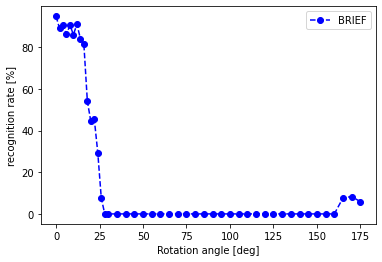

In [11]:
briefRotTest.construct_graph(recognition_results)

## BRIEF rotation

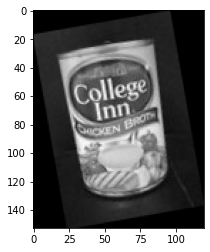

In [6]:
deg = 10
M, rotated_image = briefRotTest.rotation_matrix(im, deg)

locs1, desc1 = BRIEF.briefLite(im)
locs2, desc2 = BRIEF.briefLite(rotated_image)
matches = BRIEF.briefMatch(desc1, desc2)

pt1 = locs1[matches[:,0], 0:2]
pt2 = locs2[matches[:,1], 0:2]

# Theory coordinates 
pt1_augment = np.c_[pt1, np.ones(pt1.shape[0])].T   
pt1_rotate = np.matmul(M, pt1_augment).T

plt.imshow(rotated_image, cmap='gray')

In [7]:
# Compute the homography
pairsNum = 4
index = [1,2,4,5]
pairs_d = pt2[index,:]
pairs_s = pt1[index,:]
H_stod = planarH.computeH(pairs_d, pairs_s, pairsNum)

pt1_homo = np.matmul(H_stod, pt1_augment)
pt1_homo = (pt1_homo/pt1_homo[2,:]).T

In [8]:
residual = pt1_homo[:,:2] - pt2
dist = np.sum(residual**2, axis=1)**0.5